## Observations and Insights 

* Ramicane drug regimen has the lowest mean tumor volume followeed by Capomulin whereas Ketapril has the highest tumor volume.
* Most number of measurements were taken under Ramicane and Capomulin drug regimen.
* The proportion of Male and Female mices are almost the same.
* The linear regression model to determine Tumor Vol (mm3) based on Weight (g) is a model with correlation cofficient 1.41 and equation: y = 1.41x + 13.61.

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [68]:
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [69]:
len(mouse_metadata)

249

In [70]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [71]:
len(study_results)

1893

In [72]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
len(combined_df)

1893

In [74]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [75]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first"), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [76]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [78]:
# Checking the number of mice in the clean DataFrame.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# mean,
mean_tumor_volume = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#median,
median_tumor_volume = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
#variance,
variance_tumor_volume = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
#standard deviation,
std_tumor_volume = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
#SEM 
sem_tumor_volume = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume, 
                            "Median Tumor Volume":median_tumor_volume, 
                           "Tumor Volume Variance":variance_tumor_volume, 
                           "Tumor Volume Std. Dev.":std_tumor_volume, 
                           "Tumor Volume Std. Err.":sem_tumor_volume})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_count = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_count = mice_count.sort_values(ascending=False)
mice_count = mice_count.reindex()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Mouse ID, dtype: int64

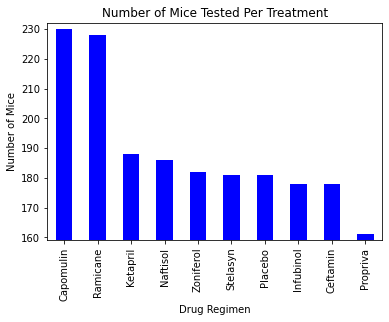

In [141]:
#Pandas bar chart
bar_df = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested Per Treatment")
plt.ylim(min(mice_count)-2,max(mice_count)+2)
#bar_plot = drugs.plot(kind="bar", title="Number of Mice Tested Per Drug Regimen")
bar_df;

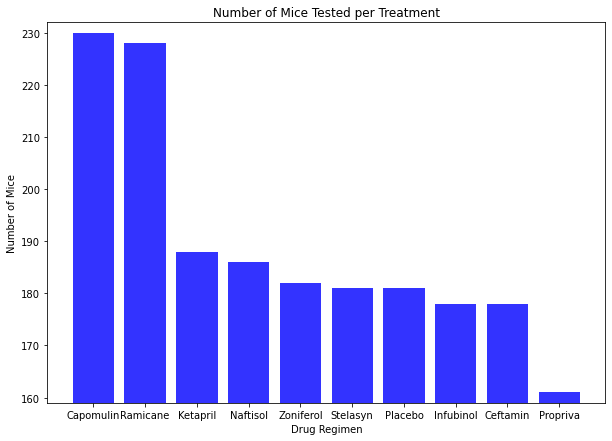

In [140]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(min(y_axis)-2,max(y_axis)+2)
plt.show;

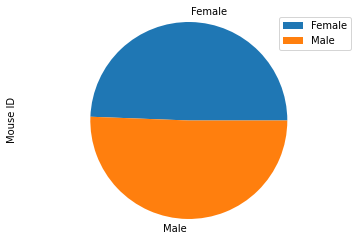

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_chart_pd = clean_df.groupby('Sex').count().plot.pie(y="Mouse ID")
plt.axis('equal')
pie_chart_pd;

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart_pd = clean_df.groupby('Sex').count()["Mouse ID"]
pie_chart_pd


Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

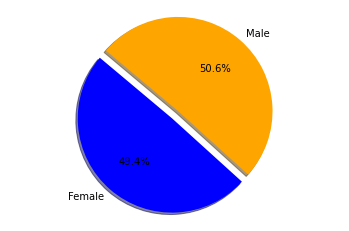

In [133]:
explode = (0.1, 0)
colors = ["blue", "orange"]
labels = list(pie_chart_pd.index)
plt.pie(pie_chart_pd, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
clean_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [88]:
clean_df.groupby('Mouse ID').max()['Timepoint'].reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [89]:
last_timepoint_df = clean_df.groupby('Mouse ID').max()['Timepoint'].reset_index()
last_timepoint_df = last_timepoint_df.rename(columns={'Timepoint':'Max_Timepoint'})
pd.merge(clean_df,last_timepoint_df,how='left',on='Mouse ID').head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [65]:
#final_tumor_vol_df = clean_df.loc[clean_df['Timepoint']==clean_df['Max_Timepoint'],['Mouse ID','Tumor Volume (mm3)']]
#final_tumor_vol_df.reset_index(drop=True,inplace=True)
#final_tumor_vol_df = final_tumor_vol_df.rename(columns={'Tumor Volume (mm3)':'Tumor Vol last Timepoint'})
#final_tumor_vol_df.head(15)

,Mouse ID,Tumor Vol last Timepoint
0,k403,22.050126
1,s185,23.343598
2,x401,28.484033
3,m601,28.430964
4,g791,29.128472
5,s508,30.276232
6,f966,30.485985
7,m546,30.564625
8,z578,30.638696
9,j913,31.560470


In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby('Mouse ID').max()['Timepoint'].reset_index()
last_timepoint_df = last_timepoint_df.rename(columns={'Timepoint':'Max_Timepoint'})

clean_df = pd.merge(clean_df,last_timepoint_df,how='left',on='Mouse ID')

final_tumor_vol_df = clean_df.loc[clean_df['Timepoint']==clean_df['Max_Timepoint'],['Mouse ID','Tumor Volume (mm3)']]
final_tumor_vol_df.reset_index(drop=True,inplace=True)
final_tumor_vol_df = final_tumor_vol_df.rename(columns={'Tumor Volume (mm3)':'Tumor Vol last Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_df = clean_df.merge(final_tumor_vol_df,how='left',on='Mouse ID')
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint,Tumor Vol last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126


In [95]:
clean_df.groupby('Drug Regimen').quantile([.25,.5,.75])['Tumor Volume (mm3)'].reset_index()

,Drug Regimen,level_1,Tumor Volume (mm3)
0,Capomulin,0.25,37.685933
1,Capomulin,0.50,41.557809
2,Capomulin,0.75,45.000000
3,Ceftamin,0.25,47.208427
4,Ceftamin,0.50,51.776157
5,Ceftamin,0.75,56.801438
6,Infubinol,0.25,47.312353
7,Infubinol,0.50,51.820584
8,Infubinol,0.75,57.314444
9,Ketapril,0.25,48.232987


In [97]:
regimen_pctile_df = clean_df.groupby('Drug Regimen').quantile([.25,.5,.75])['Tumor Volume (mm3)'].reset_index()
regimen_pctile_df = regimen_pctile_df.pivot(index='Drug Regimen',columns='level_1', values='Tumor Volume (mm3)').reset_index()
regimen_pctile_df['IQR'] = regimen_pctile_df[0.75]-regimen_pctile_df[0.25]
regimen_pctile_df['Lower Bound'] = regimen_pctile_df[0.25] - (1.5*regimen_pctile_df['IQR'])
regimen_pctile_df['Upper Bound'] = regimen_pctile_df[0.75] + (1.5*regimen_pctile_df['IQR'])
regimen_pctile_df

level_1,Drug Regimen,0.25,0.5,0.75,IQR,Lower Bound,Upper Bound
0,Capomulin,37.685933,41.557809,45.000000,7.314067,26.714832,55.971101
1,Ceftamin,47.208427,51.776157,56.801438,9.593010,32.818911,71.190953
2,Infubinol,47.312353,51.820584,57.314444,10.002091,32.309217,72.317580
3,Ketapril,48.232987,53.698743,60.870951,12.637964,29.276042,79.827897
4,Naftisol,47.285874,52.509285,59.963034,12.677160,28.270134,78.978774
5,Placebo,47.459053,52.288934,59.916934,12.457882,28.772231,78.603757
6,Propriva,47.081086,50.854632,56.184664,9.103578,33.425719,69.840031
7,Ramicane,36.674635,40.673236,45.000000,8.325365,24.186586,57.488048
8,Stelasyn,48.047139,52.431737,58.719297,10.672158,32.038901,74.727535
9,Zoniferol,47.337876,51.818479,57.954259,10.616383,31.413302,73.878833


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(clean_df['Drug Regimen'].unique())
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimen_pctile_df = clean_df.groupby('Drug Regimen').quantile([.25,.5,.75])['Tumor Volume (mm3)'].reset_index()
regimen_pctile_df = regimen_pctile_df.pivot(index='Drug Regimen',columns='level_1', values='Tumor Volume (mm3)').reset_index()
    
# Locate the rows which contain mice on each drug and get the tumor volumes
regimen_pctile_df['IQR'] = regimen_pctile_df[0.75]-regimen_pctile_df[0.25]
regimen_pctile_df['Lower Bound'] = regimen_pctile_df[0.25] - (1.5*regimen_pctile_df['IQR'])
regimen_pctile_df['Upper Bound'] = regimen_pctile_df[0.75] + (1.5*regimen_pctile_df['IQR'])

# add subset 
clean_df = clean_df.merge(regimen_pctile_df, how='left',on='Drug Regimen')
clean_df.head()     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint,Tumor Vol last Timepoint,0.25,0.5,0.75,IQR,Lower Bound,Upper Bound
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048


In [101]:
# Determine outliers using upper and lower bounds
clean_df['Outlier Flag'] = 'Not Outlier'
clean_df.loc[(clean_df['Tumor Volume (mm3)']<clean_df['Lower Bound'])|(clean_df['Tumor Volume (mm3)']>clean_df['Upper Bound']),'Outlier Flag'] = 'Outlier'
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint,Tumor Vol last Timepoint,0.25,0.5,0.75,IQR,Lower Bound,Upper Bound,Outlier Flag
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048,Not Outlier
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048,Not Outlier
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048,Not Outlier
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048,Not Outlier
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126,36.674635,40.673236,45.0,8.325365,24.186586,57.488048,Not Outlier


In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = clean_df.loc[clean_df['Timepoint']==clean_df['Max_Timepoint'],['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
box_plot_df.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472


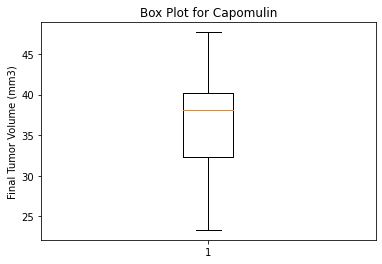

In [104]:
plt.boxplot(box_plot_df.loc[box_plot_df['Drug Regimen']=='Capomulin','Tumor Volume (mm3)'])
plt.title('Box Plot for Capomulin')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

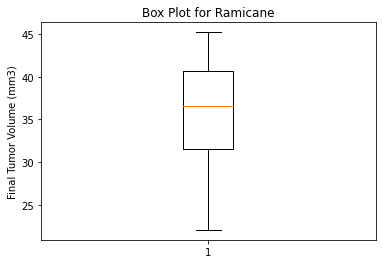

In [105]:
plt.boxplot(box_plot_df.loc[box_plot_df['Drug Regimen']=='Ramicane','Tumor Volume (mm3)'])
plt.title('Box Plot for Ramicane')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

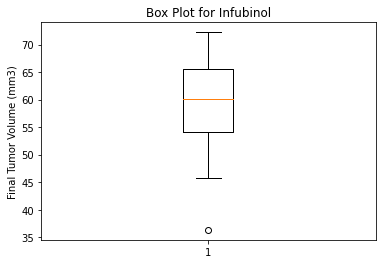

In [106]:
plt.boxplot(box_plot_df.loc[box_plot_df['Drug Regimen']=='Infubinol','Tumor Volume (mm3)'])
plt.title('Box Plot for Infubinol')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

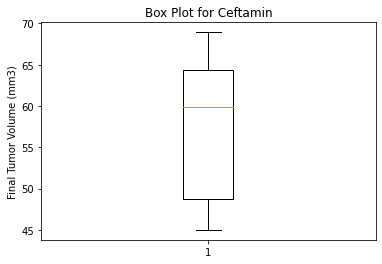

In [107]:
plt.boxplot(box_plot_df.loc[box_plot_df['Drug Regimen']=='Ceftamin','Tumor Volume (mm3)'])
plt.title('Box Plot for Ceftamin')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [110]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin',['Mouse ID','Timepoint','Tumor Volume (mm3)']]
line_plot_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


In [112]:
mouse_id = list(line_plot_df['Mouse ID'].unique())

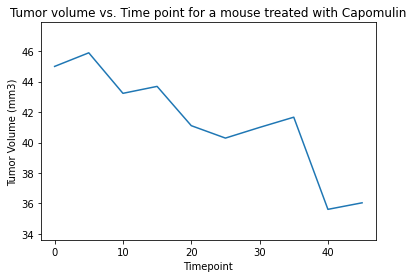

In [132]:
i = mouse_id[10]
line_plot_df_temp = line_plot_df[line_plot_df['Mouse ID']==i]
plt.plot(line_plot_df_temp['Timepoint'],line_plot_df_temp['Tumor Volume (mm3)'])

plt.title('Tumor volume vs. Time point for a mouse treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(min(line_plot_df_temp['Timepoint'])-2,max(line_plot_df_temp['Timepoint'])+2)
plt.ylim(min(line_plot_df_temp['Tumor Volume (mm3)'])-2,max(line_plot_df_temp['Tumor Volume (mm3)'])+2)
plt.show()

In [115]:
scatter_plot_df = clean_df.groupby('Weight (g)').mean()['Tumor Volume (mm3)'].reset_index()
scatter_plot_df.head()

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,16,36.766850
2,17,38.039595
3,18,37.882878
4,19,40.490692


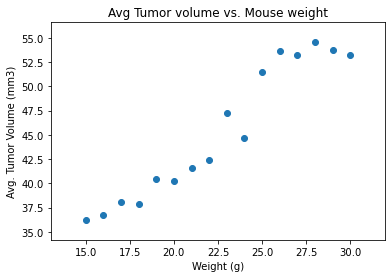

In [130]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = reg_df['Weight (g)']
y_values = reg_df['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)

plt.title('Avg Tumor volume vs. Mouse weight')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')

plt.xlim(min(x_values)-2,max(x_values)+2)
plt.ylim(min(y_values)-2,max(y_values)+2)

plt.show()

## Correlation and Regression

In [117]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
reg_df = clean_df.groupby('Weight (g)').mean()['Tumor Volume (mm3)'].reset_index()
reg_df.head()

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,16,36.766850
2,17,38.039595
3,18,37.882878
4,19,40.490692


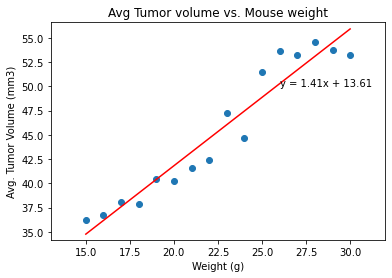

In [129]:
x_values = reg_df['Weight (g)']
y_values = reg_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,50),fontsize=10,color="black")
plt.title('Avg Tumor volume vs. Mouse weight')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.xlim(min(x_values)-2,max(x_values)+2)
plt.ylim(min(y_values)-2,max(y_values)+2)
plt.show()

In [120]:
print('Correlation Coefficient:',slope)
print('Linear Regression Model:',line_eq)

Correlation Coefficient: 1.410656592449503
Linear Regression Model: y = 1.41x + 13.61
